<a href="https://colab.research.google.com/github/joerg84/Graph_Powered_ML_Workshop/blob/master/Node2VecIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Node2Vec  and Embeddings


<a href="https://colab.research.google.com/github/joerg84/Graph_Powered_ML_Workshop/blob/master/Node2VecIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we will explore a basic example using our favorite Karate Club Graph and Node2Vec.



In [1]:
%%capture
!pip3 install  node2vec

In [2]:
import networkx as nx
import pandas as pd
from node2vec import Node2Vec as n2v

{'club': 'Mr. Hi'}
{'club': 'Officer'}


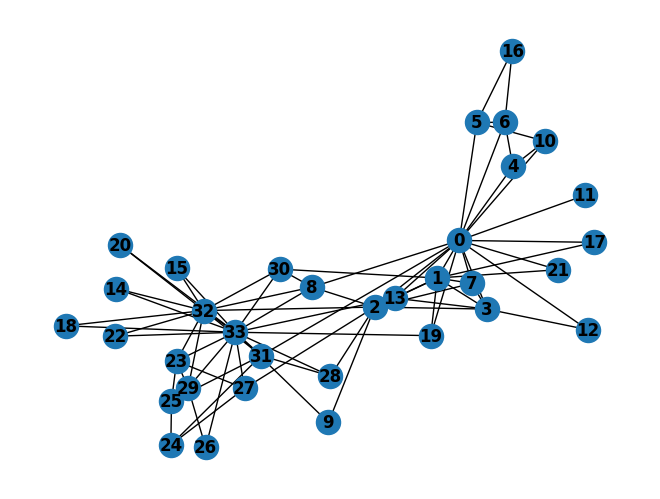

In [3]:
# Load the Zachary's Karate Club as a NetworkX Graph object
KCG = nx.karate_club_graph()

print(KCG.nodes[1])
print(KCG.nodes[33])

# print final assignments
#for node in KCG.nodes:
#  print(str(node+1)+"," + str(KCG.nodes[node]['club']))

nx.draw(KCG, with_labels=True, font_weight='bold')

Next, let us run Node2Vec to create embeddings.

In [4]:
# Generate Random walks
g_emb = n2v(KCG, dimensions=2)
WINDOW = 1 # Node2Vec fit window
MIN_COUNT = 1 # Node2Vec min. count
BATCH_WORDS = 4 # Node2Vec batch words

# Fit model
model = g_emb.fit(
    vector_size = 2,
    window=WINDOW,
    min_count=MIN_COUNT,
    batch_words=BATCH_WORDS
)

Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 63.71it/s]


Let us find similar members/nodes:

In [5]:
input_node = '1'
for s in model.wv.most_similar(input_node, topn = 10):
    print(s)

('7', 0.9999281764030457)
('19', 0.9992406964302063)
('3', 0.9983761310577393)
('17', 0.9931438565254211)
('0', 0.9888537526130676)
('13', 0.988137423992157)
('12', 0.9864974021911621)
('2', 0.9857160449028015)
('11', 0.9851359724998474)
('21', 0.9840869903564453)


Let us combine the embedding with the actual club name after the split.

2D Embedding for each node:
           x         y
0   0.055632  1.423553
1  -0.137784  1.243129
2  -0.316039  1.100686
3  -0.070591  1.320970
4   0.565301  2.024575
5   0.795717  2.468235
6   0.663879  2.296049
7  -0.150117  1.220542
8  -0.784901  0.830393
9  -0.970963  0.763394
10  0.599378  2.174888
11  0.089602  1.437617
12  0.077849  1.436739
13 -0.294165  1.085805
14 -1.406202  0.717644
15 -1.406585  0.713221
16  0.844308  2.545988
17  0.009155  1.350210
18 -1.431314  0.662843
19 -0.174119  1.157108
20 -1.617987  0.684183
21  0.096475  1.411350
22 -1.320812  0.729884
23 -1.829107  0.701720
24 -1.703129  0.663099
25 -1.772549  0.645367
26 -1.775907  0.664188
27 -1.423486  0.699096
28 -0.948667  0.777170
29 -1.862404  0.678899
30 -1.057658  0.784021
31 -1.385234  0.697078
32 -1.462840  0.725140
33 -1.428010  0.744825
Embeddings Plot


<Axes: xlabel='x', ylabel='y'>

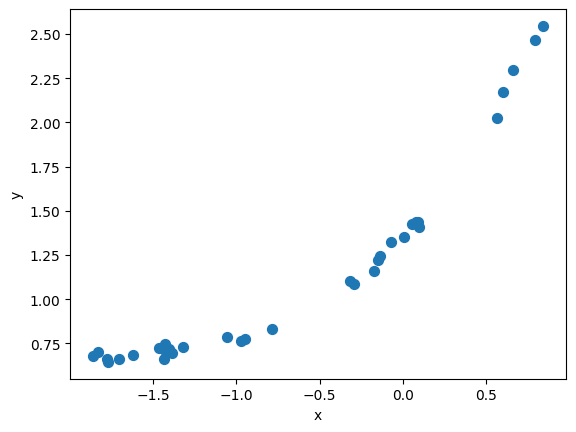

In [13]:
embeddings = []
for node in KCG.nodes:
  embedding = list(model.wv.get_vector(str(node)))
  embeddings.append(embedding)

ef = pd.DataFrame(embeddings, columns=['x', 'y'])
print ("2D Embedding for each node:")
print(ef)

print("Embeddings Plot")
ef.plot.scatter(x='x', y='y', s=50)



As we actually know the club each member ended up, let us augment that information. Please note this wasn't used during the embedding generation.

In [12]:
embeddings = []
for node in KCG.nodes:
  embedding = list(model.wv.get_vector(str(node)))
  club = KCG.nodes[node]['club']
  embeddings.append(embedding + [club])

df = pd.DataFrame(embeddings, columns=['x', 'y', 'club'])
print ("Augmented Embeddings with club Information:")
print(df)

Augmented Embeddings with club Information:
           x         y     club
0   0.055632  1.423553   Mr. Hi
1  -0.137784  1.243129   Mr. Hi
2  -0.316039  1.100686   Mr. Hi
3  -0.070591  1.320970   Mr. Hi
4   0.565301  2.024575   Mr. Hi
5   0.795717  2.468235   Mr. Hi
6   0.663879  2.296049   Mr. Hi
7  -0.150117  1.220542   Mr. Hi
8  -0.784901  0.830393   Mr. Hi
9  -0.970963  0.763394  Officer
10  0.599378  2.174888   Mr. Hi
11  0.089602  1.437617   Mr. Hi
12  0.077849  1.436739   Mr. Hi
13 -0.294165  1.085805   Mr. Hi
14 -1.406202  0.717644  Officer
15 -1.406585  0.713221  Officer
16  0.844308  2.545988   Mr. Hi
17  0.009155  1.350210   Mr. Hi
18 -1.431314  0.662843  Officer
19 -0.174119  1.157108   Mr. Hi
20 -1.617987  0.684183  Officer
21  0.096475  1.411350   Mr. Hi
22 -1.320812  0.729884  Officer
23 -1.829107  0.701720  Officer
24 -1.703129  0.663099  Officer
25 -1.772549  0.645367  Officer
26 -1.775907  0.664188  Officer
27 -1.423486  0.699096  Officer
28 -0.948667  0.777170  Offi

Let us print the embedded nodes together with the color of the actual resulting club.

<Axes: xlabel='x', ylabel='y'>

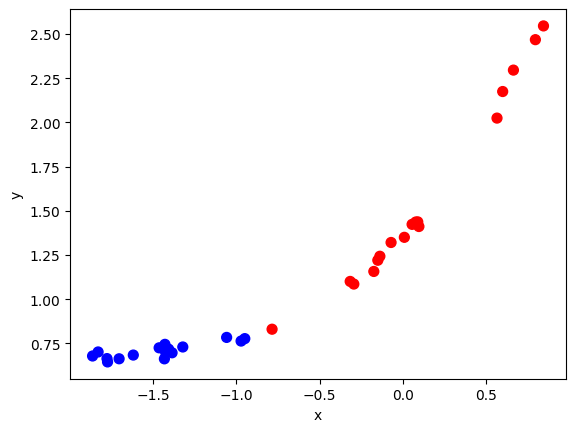

In [7]:
colors = ['red' if x == 'Mr. Hi' else 'blue' for x in df.club]
df.plot.scatter(x='x', y='y', s=50, c=colors)

# Bonus:  Dimensionality Reduction

Normally, we want embeddings dimensions greater than two. Unfortunately, high dimensional spaces are ... hard to visualize. Luckily we have tools such as [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) or [UMAP](https://umap-learn.readthedocs.io/en/latest/basic_usage.html) to reduce dimensionality.

In [8]:
import numpy as np
from sklearn.manifold import TSNE

In [9]:
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2, learning_rate='auto',
             init='random', perplexity=3).fit_transform(X)
X_embedded.shape

(4, 2)